<a href="https://colab.research.google.com/github/neel561/python-/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project 16: House Price Prediction 

---

### Context

The price of the house depends on various factors like locality, connectivity, number of rooms, etc. Change in the mindset of the millennial generation also contributes to ups and down in house prices as the young generation is much into renting than to owe a house. Predicting the right price of the house is important for investors in the real estate business. This makes it very important to come up with proper and smart technique to estimate the true price of the house. 
 

---

#### Getting Started

Follow the steps described below to solve the project:

1. Click on the link provided below to open the Colab file for this project.
   
   https://colab.research.google.com/drive/1A8Ui9xG_ilL23kUKPj3Nd_XSyF-OBewR

2. Create the duplicate copy of the Colab file. Here are the steps to create the duplicate copy:

    - Click on the **File** menu. A new drop-down list will appear.

      <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/0_file_menu.png' width=500>

    - Click on the **Save a copy in Drive** option. A duplicate copy will get created. It will open up in the new tab on your web browser.

      <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/1_create_colab_duplicate_copy.png' width=500>

     - After creating the duplicate copy of the notebook, please rename it in the **YYYY-MM-DD_StudentName_CapstoneProject17** format. 

3. Now, write your code in the prescribed code cells.

---

### Problem Statement


You are willing to sell your house. You are not sure about the price of your house and want to estimate its price. You are provided with the dataset and need to make a prediction model which will help you to get a good estimate of your house for selling it. 

---

### Data Description

The **housing** dataset contains the prices and other attributes. There are $545$ rows and $12$ attributes (features) with a target column (price). 

Following are the features:  

|Column|Description|
|---:|:---|
|`Price`|Price in INR|
|`area`|Area in square ft.|
|`bedrooms`|Number of bedrooms in the house|
|`bathrooms`|Number of bathrooms in the house|
|`stories`|Number of stores in the house|
|`mainroad`|Whether house is on main road or not(binary)|
|`guestroom`|Whether house have guestroom or not(binary)|
|`basement`|Whether house have basement or not(binary)|
|`airconditioning`|Whether house have airconditioning or not(binary)|
|`hotwaterheating`|Whether house have hotwaterheating or not(binary)|
|`parking`|Number of parking area|
|`prefarea`|Whether house have prefarea or not(binary)|
|`furnishingstatus`|Furnish status of the house|


  **Dataset Link:**  https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/house-prices.csv


---

### Things To Do

1. Explore the Housing dataset by creating the following plots:
   - Box plots between each categorical feature and the `price`.
   - Scatter plots between the numerical features and the `price`.
   
2. Convert categorical attributes into numerical attributes using feature encoding.

3. Build a linear regression model by selecting the most relevant features to predict the price of houses.

4. Evaluate the linear regression model by calculating the parameters such as coefficient of determination, MAE, MSE, RMSE, mean of residuals and by checking for homoscedasticity.



---

#### 1. Import Modules and Load Dataset

**Dataset Link:** https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/house-prices.csv








In [ ]:
# Import the required modules and load the dataset.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
# Load the dataset
df = pd.read_csv('https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/house-prices.csv')
# Print first five rows using head() function
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# Get the information on DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
# Check if there are any NULL values.
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

---

#### 2. Exploratory Data Analysis

We need to predict the value of `price` variable, using other variables. Thus, `price` is the target or dependent variable and other columns except `price` are the features or the independent variables. 

Perform the following tasks:

- Create Box plots between each **categorical** variable and the target variable `price` to sense the distribution of values.

- Create the Scatter plots between each **numerical** variable and the target variable `price`. Determine which variable(s) shows linear relationship with the target variable `price`. 

- Create a normal distribution curve for the `price`.


In [ ]:
# Check categorical attributes
df1 = df.select_dtypes(include=['object'])
df1

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


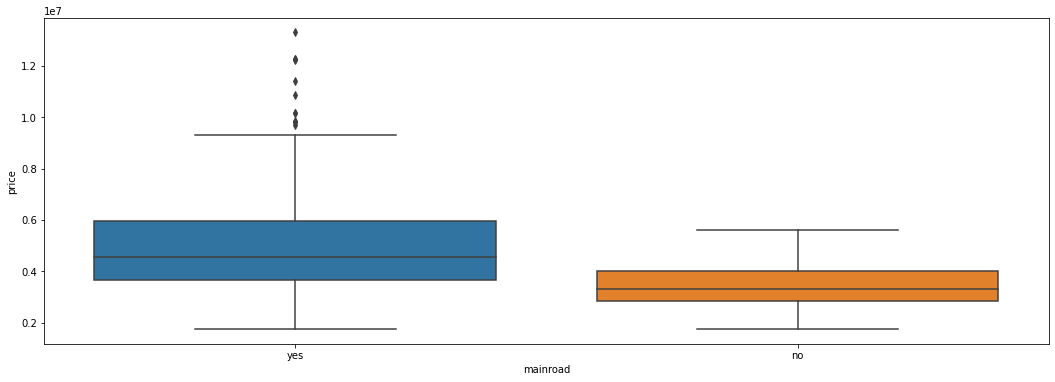

In [ ]:
# Boxplot for 'mainroad' vs 'price'
plt.figure(figsize=(18,6))
sns.boxplot(x = 'mainroad', y= 'price',data= df)
plt.show()

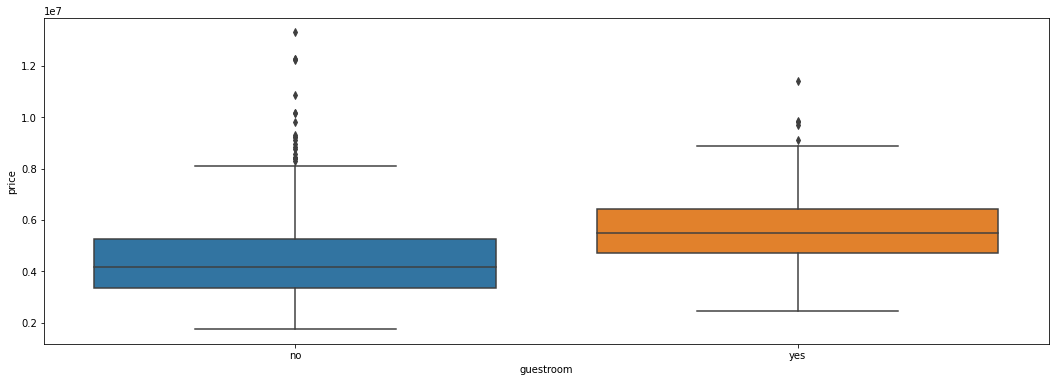

In [ ]:
# Boxplot for 'guestroom' vs 'price'
plt.figure(figsize=(18,6))
sns.boxplot(x = 'guestroom', y= 'price',data= df)
plt.show()


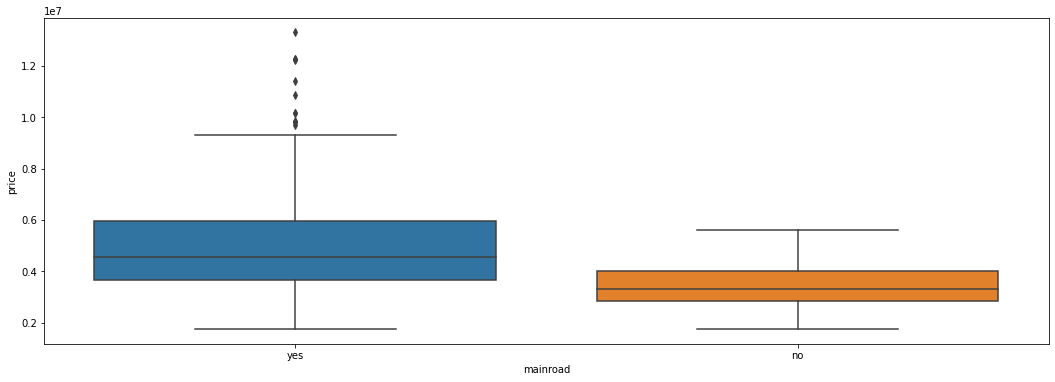

In [ ]:
# Boxplot for 'basement' vs 'price'
plt.figure(figsize=(18,6))
sns.boxplot(x = 'mainroad', y= 'price',data= df)
plt.show()

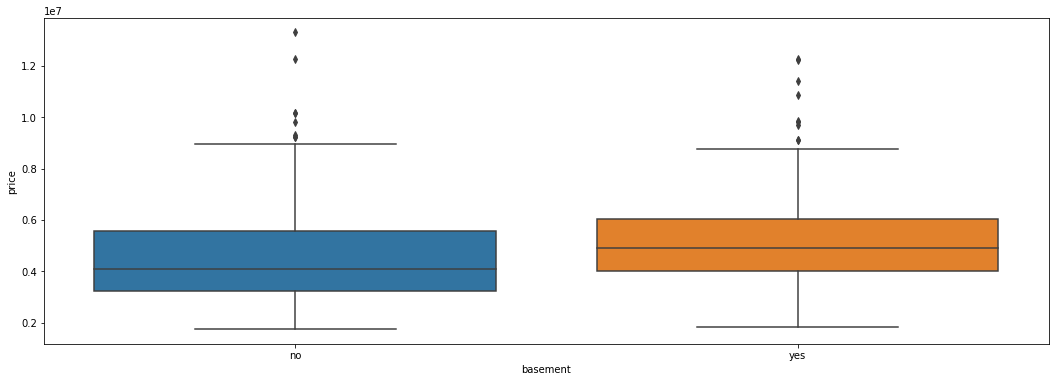

In [ ]:
# Boxplot for 'hotwaterheating' vs 'price'
plt.figure(figsize=(18,6))
sns.boxplot(x = 'basement', y= 'price',data= df)
plt.show()

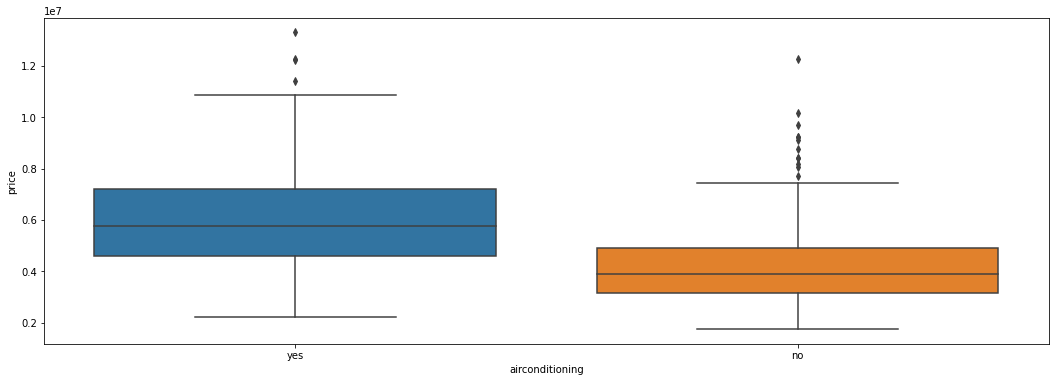

In [ ]:
# Boxplot for 'airconditioning' vs 'price'
plt.figure(figsize=(18,6))
sns.boxplot(x = 'airconditioning', y= 'price',data= df)
plt.show()


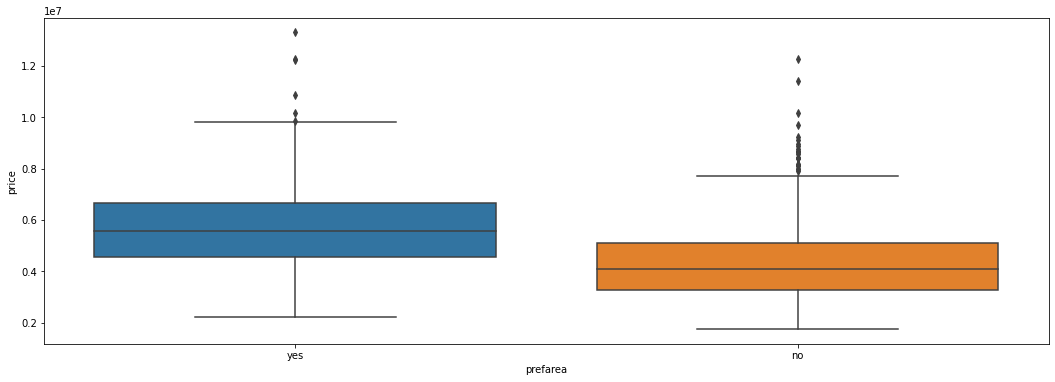

In [ ]:
# Boxplot for 'prefarea' vs 'price'
plt.figure(figsize=(18,6))
sns.boxplot(x = 'prefarea', y= 'price',data= df)
plt.show()


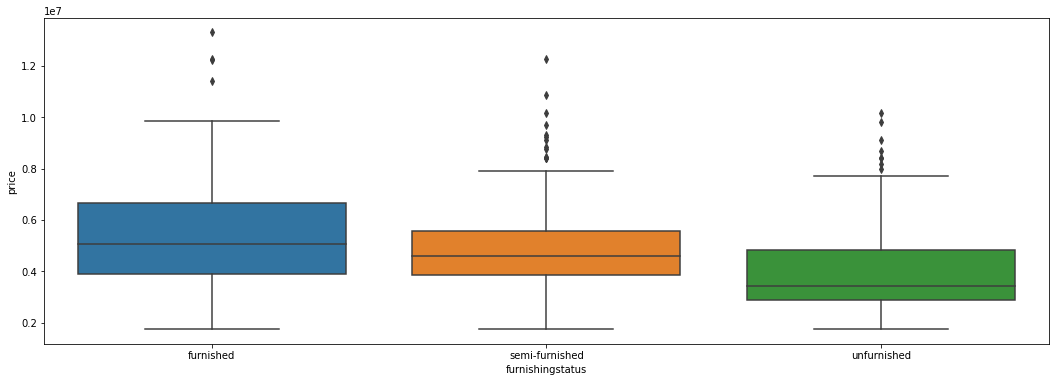

In [ ]:
# Boxplot for 'furnishingstatus' vs 'price'
plt.figure(figsize=(18,6))
sns.boxplot(x = 'furnishingstatus', y= 'price',data= df)
plt.show()

No handles with labels found to put in legend.


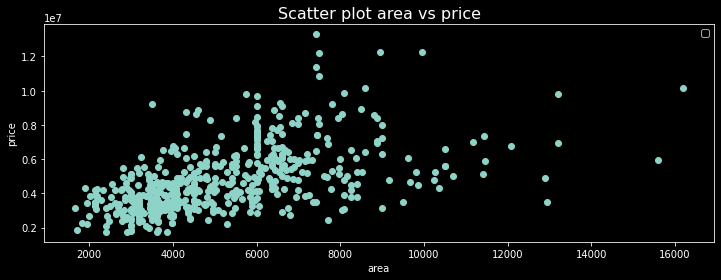

In [ ]:
# Create scatter plot with 'area' on X-axis and 'price' on Y-axis
plt.style.use('dark_background')
plt.figure(figsize = (12,4))
plt.title('Scatter plot area vs price',fontsize= 16)
plt.scatter(df['area'],df['price'])
plt.xlabel('area')
plt.ylabel('price')
plt.legend()
plt.show()


No handles with labels found to put in legend.


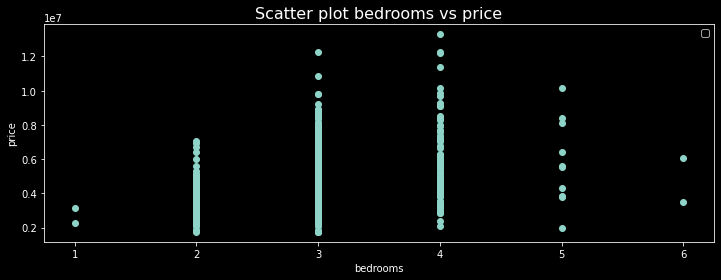

In [ ]:
# Create scatter plot with 'bedrooms' on X-axis and 'price' on Y-axis
plt.style.use('dark_background')
plt.figure(figsize = (12,4))
plt.title('Scatter plot bedrooms vs price',fontsize= 16)
plt.scatter(df['bedrooms'],df['price'])
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.legend()
plt.show()

No handles with labels found to put in legend.


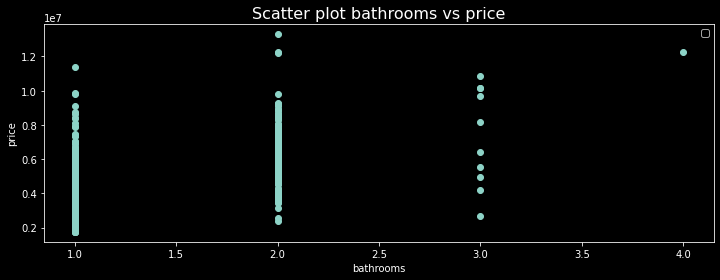

In [ ]:
# Create scatter plot with 'bathrooms' on X-axis and 'price' on Y-axis
plt.style.use('dark_background')
plt.figure(figsize = (12,4))
plt.title('Scatter plot bathrooms vs price',fontsize= 16)
plt.scatter(df['bathrooms'],df['price'])
plt.xlabel('bathrooms')
plt.ylabel('price')
plt.legend()
plt.show()

No handles with labels found to put in legend.


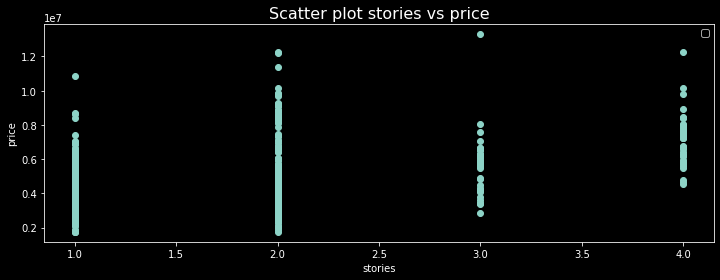

In [ ]:
# Create scatter plot with 'stories' on X-axis and 'price' on Y-axis
plt.style.use('dark_background')
plt.figure(figsize = (12,4))
plt.title('Scatter plot stories vs price',fontsize= 16)
plt.scatter(df['stories'],df['price'])
plt.xlabel('stories')
plt.ylabel('price')
plt.legend()
plt.show()

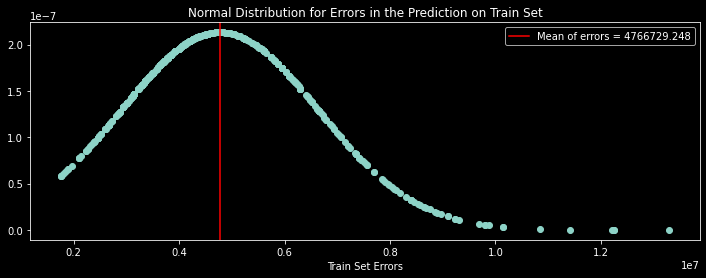

In [ ]:
# Create a normal distribution curve for the 'price'.
def prob_density_func(series):
  CONST = 1 / (series.std() * np.sqrt(2 * np.pi))
  power_of_e = - (series - series.mean()) ** 2 / (2 * series.var()) # 'pd.Series.var()' function returns the variance of the series.
  new_array = CONST * np.exp(power_of_e)
  return new_array

# Plot the normal distribution curve using plt.scatter() 
plt.figure(figsize = (12,4))
plt.scatter(df['price'], prob_density_func(df['price']))
plt.title("Normal Distribution for Errors in the Prediction on Train Set")
plt.axvline(x = df['price'].mean(), label = f"Mean of errors = {df['price'].mean():.3f}", color = 'r')
plt.xlabel("Train Set Errors")
plt.legend()
plt.show()
# Create a probablity density function for plotting the normal distribution


# Plot the normal distribution curve using plt.scatter() 


---

#### 3. Feature encoding 

Perform feature encoding using `map()` function and one-hot encoding.

In [ ]:
# Replace yes with 1 and no with 0 for all the values in features 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea' using map() function.

df["mainroad"]= df["mainroad"].map({"no": 0, "yes": 1})
df["guestroom"]=df["guestroom"].map({"no": 0, "yes": 1})
df["basement"]=df["basement"].map({"no": 0, "yes": 1})
df["hotwaterheating"]=df["hotwaterheating"].map({"no": 0, "yes": 1})
df["airconditioning"]=df["airconditioning"].map({"no": 0, "yes": 1})
df["prefarea"]=df["prefarea"].map({"no": 0, "yes": 1})


In [ ]:
# Print dataframe
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
# Perform one hot encoding for furnishingstatus feature.
df2= pd.get_dummies(df['furnishingstatus'],drop_first=True)
df= pd.concat([df,df2],axis = 1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [ ]:
# Drop 'furnishingstatus' feature
df.drop(['furnishingstatus'],axis = 1, inplace=True)

In [ ]:
# Print dataframe 
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


---

#### 4. Model Building and Evaluation 

Build a multiple linear regression model using the `statsmodels.api` module.

In [ ]:
# Split the 'df' Dataframe into the train and test sets.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features = list(df.columns.values[:])
features.remove('price')

x = df[features]
y = df['price']


In [ ]:
# Create separate data-frames for the feature and target variables for both the train and test sets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42) # Test set will have 33% of the values.



In [ ]:
# Build a linear regression model using all the features to predict prices.

import statsmodels.api as sm

# Create data frames for the features and target again and also split them into the train and test sets.
x = df[features]
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42) # Test set will have 33% of the values.

# Add a constant to get an intercept
x_train_sm = sm.add_constant(x_train)

# Fit the regression line using 'OLS'
lr = sm.OLS(y_train, x_train_sm).fit()

# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params


const              9.466197e+04
area               2.509977e+02
bedrooms           9.067702e+04
bathrooms          1.122346e+06
stories            3.979632e+05
mainroad           4.110134e+05
guestroom          3.164676e+05
basement           4.831433e+05
hotwaterheating    6.188329e+05
airconditioning    6.858926e+05
parking            2.915290e+05
prefarea           5.231189e+05
semi-furnished    -1.119324e+05
unfurnished       -3.946203e+05
dtype: float64

In [ ]:
# Print the summary of the linear regression report.
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     59.15
Date:                Fri, 11 Feb 2022   Prob (F-statistic):           3.99e-80
Time:                        03:37:59   Log-Likelihood:                -5555.1
No. Observations:                 365   AIC:                         1.114e+04
Df Residuals:                     351   BIC:                         1.119e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            9.466e+04   3.02e+05     

In [ ]:
# Calculate N and p values
num_rows = x_train.shape[0]
num_predictor = x_train.shape[1]
print('rows',num_rows)
print('predictors',num_predictor)


rows 365
predictors 13


In [ ]:
# Calculate the adjusted R-square value.
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_squared_log_error
r2 = lr.rsquared
train_r2_adj = 1-((1-r2)*(num_rows-1))/(num_rows-num_predictor)
print(train_r2_adj)




0.675916042491332


**Q:** What is the Adjusted $R^2$ value?

**A:** 


---

#### 5. Model Evaluation

Build a multiple linear regression model  using `sklearn` module. Also, evaluate the model by calculating $R^2$, MSE, RMSE, and MAE values.

In [ ]:
# Build multiple linear regression model using all the features
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y_train_reshaped = y_train.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)

# Build a linear regression model using the 'sklearn.linear_model' module.
sklearn_lin_reg = LinearRegression()
sklearn_lin_reg.fit(x_train, y_train_reshaped)

# Print the value of the intercept i.e. beta-sub-0.
print("\nConstant".ljust(15, " "), f"{sklearn_lin_reg.intercept_[0]:.6f}") # Soon you will get to know why rounding-off to 6 decimal places.

# Print the names of the features along with the values of their corresponding coefficients.
for item in list(zip(x.columns.values, sklearn_lin_reg.coef_[0])):
  print(f"{item[0]}".ljust(15, " "), f"{item[1]:.6f}") # Soon you will get to know why rounding-off to 6 decimal places.



Constant       94661.969243
area            250.997691
bedrooms        90677.021494
bathrooms       1122345.501685
stories         397963.196835
mainroad        411013.426656
guestroom       316467.603559
basement        483143.339576
hotwaterheating 618832.907788
airconditioning 685892.608073
parking         291528.989513
prefarea        523118.858362
semi-furnished  -111932.419725
unfurnished     -394620.325382


In [ ]:
# Evaluate the linear regression model using the 'r2_score', 'mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module.
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_train_pred = sklearn_lin_reg.predict(x_train)
y_test_pred = sklearn_lin_reg.predict(x_test)

print(f"Train Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y_train_reshaped, y_train_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_train_reshaped, y_train_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train_reshaped, y_train_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train_reshaped, y_train_pred):.3f}")
      
print(f"\n\nTest Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y_test_reshaped, y_test_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_test_reshaped, y_test_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test_reshaped, y_test_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test_reshaped, y_test_pred):.3f}")

Train Set
--------------------------------------------------
R-squared: 0.687
Mean Squared Error: 970200212050.999
Root Mean Squared Error: 984987.417
Mean Absolute Error: 721566.675


Test Set
--------------------------------------------------
R-squared: 0.658
Mean Squared Error: 1463722024917.146
Root Mean Squared Error: 1209843.802
Mean Absolute Error: 902329.634


**Q:** What is the $R^2$ value for train set and test set?

**A:** 

---

#### 6. Recursive Feature Elimination

Find out the best features out of all features using RFE and evaluate the model again.

In [ ]:
# Create a Python dictionary storing the moderately to highly correlated features with price and the corresponding correlation values.
# Keep correlation threshold to be 0.2
a = {}
for i in features:
  b = np.corrcoef(df['price'],df[i])[0][1]
  if b >= 0.2 or b <= -0.2:
    a[i]= b
a    

{'airconditioning': 0.4529540842560478,
 'area': 0.5359973457780796,
 'bathrooms': 0.517545339455011,
 'bedrooms': 0.3664940257738689,
 'guestroom': 0.2555172899349996,
 'mainroad': 0.2968984892639764,
 'parking': 0.3843936486357259,
 'prefarea': 0.32977704986810735,
 'stories': 0.4207123661886163,
 'unfurnished': -0.2805873573251204}

In [ ]:
# Perform RFE and select best 7 features  
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Import RFE.
l1 = LinearRegression()
rfe1 = RFE(l1,n_features_to_select=10)
rfe1.fit(x_train[a.keys()],y_train)
print(a.keys())
print(rfe1.support_)
print(rfe1.ranking_)



dict_keys(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'airconditioning', 'parking', 'prefarea', 'unfurnished'])
[ True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1]


In [ ]:
# Print the 7 features selected by RFE in the previous step.
rfe_features = x_train[a.keys()].columns[rfe1.support_]
rfe_features

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'airconditioning', 'parking', 'prefarea', 'unfurnished'],
      dtype='object')

In [ ]:
# Build multiple linear regression model using all the features selected after RFE

features = list(df.columns.values[:])
features.remove('price')

x = df[features]
y = df['price']

# Splitting the DataFrame into the train and test sets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42) # Test set will have 33% of the values.


# Build a linear regression model using the 'sklearn.linear_model' module.
sklearn_lin_reg = LinearRegression()
sklearn_lin_reg.fit(x_train, y_train)

# Print the value of the intercept i.e. beta-sub-0.
print("\nConstant".ljust(15, " "), f"{sklearn_lin_reg.intercept_:.6f}") # Soon you will get to know why rounding-off to 6 decimal places.

# Print the names of the features along with the values of their corresponding coefficients.
for item in list(zip(x.columns.values, sklearn_lin_reg.coef_)):
  print(f"{item[0]}".ljust(15, " "), f"{item[1]:.6f}")
# Split the DataFrame into the train and test sets such that test set has 33% of the values.


# Build linear regression model using the 'sklearn.linear_model' module.


# Print the value of the intercept


# Print the names of the features along with the values of their corresponding coefficients.




Constant       94661.969243
area            250.997691
bedrooms        90677.021494
bathrooms       1122345.501685
stories         397963.196835
mainroad        411013.426656
guestroom       316467.603559
basement        483143.339576
hotwaterheating 618832.907788
airconditioning 685892.608073
parking         291528.989513
prefarea        523118.858362
semi-furnished  -111932.419725
unfurnished     -394620.325382


In [ ]:
# Evaluate the linear regression model using the 'r2_score', 'mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module.

y_train_pred = sklearn_lin_reg.predict(x_train)
y_test_pred = sklearn_lin_reg.predict(x_test)

print(f"Train Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y_train, y_train_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_train, y_train_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred):.3f}")
      
print(f"\n\nTest Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y_test, y_test_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_test_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred):.3f}")

Train Set
--------------------------------------------------
R-squared: 0.687
Mean Squared Error: 970200212050.999
Root Mean Squared Error: 984987.417
Mean Absolute Error: 721566.675


Test Set
--------------------------------------------------
R-squared: 0.658
Mean Squared Error: 1463722024917.146
Root Mean Squared Error: 1209843.802
Mean Absolute Error: 902329.634


---

#### 7. Residual (Error) Analysis

Perform residual analysis to check if the residuals (errors) are normally distributed or not. For this, plot the  histogram of the residuals.

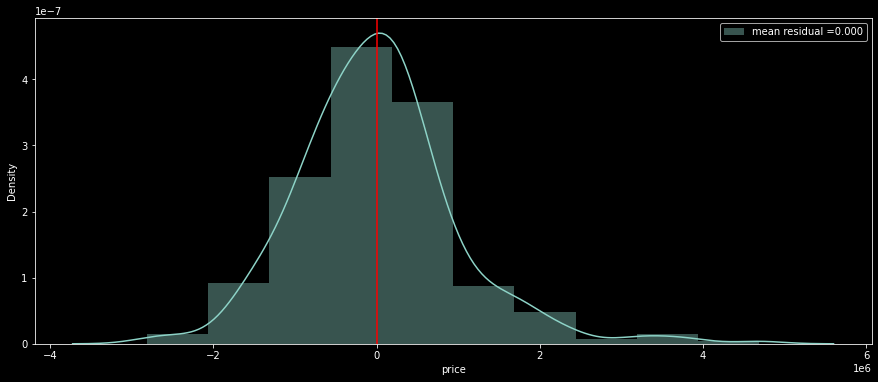

In [ ]:
# Create a histogram for the errors obtained in the predicted values for the train set.
train_residuals = y_train-y_train_pred
plt.figure(figsize=(15,6))
sns.distplot(train_residuals,bins = 'sturges',label = f'mean residual ={np.mean(train_residuals):.3f}')
plt.axvline(x = np.mean(train_residuals),color ='r')
plt.legend()
plt.show()

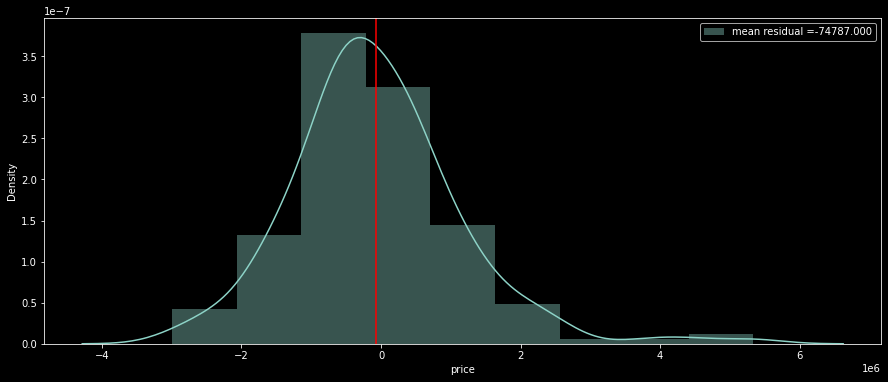

In [ ]:
# Create a histogram for the errors obtained in the predicted values for the test set.
test_residuals = y_test-y_test_pred
plt.figure(figsize=(15,6))
sns.distplot(test_residuals,bins = 'sturges',label = f'mean residual ={np.mean(test_residuals):.3f}')
plt.axvline(x = np.mean(test_residuals),color ='r')
plt.legend()
plt.show()

---

#### 8. Verify Homoscedasticity 

Check for Homoscedasticity (constant variance) by creating a scatter plot between the errors and the target variable. Determine whether there is some kind of relationship between the error and the target variable.

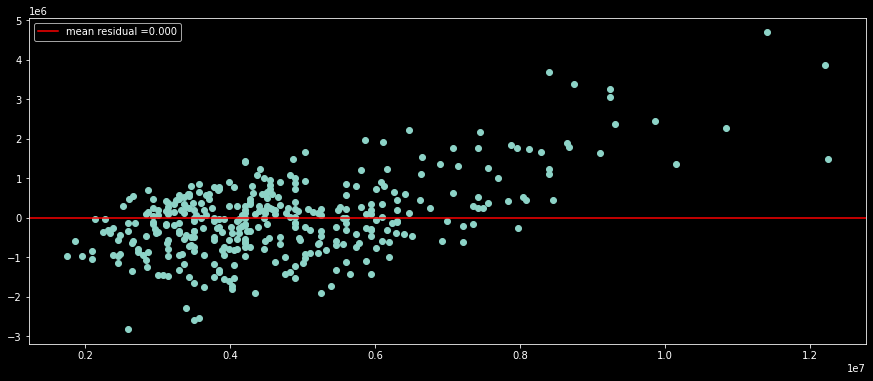

In [ ]:
# Create a scatter plot between the errors and the dependent variable for the train set.
plt.figure(figsize=(15,6))
plt.scatter(y_train ,train_residuals)
plt.axhline(y= np.mean(train_residuals),color ='r',label = f'mean residual ={np.mean(train_residuals):.3f}')
plt.legend()
plt.show()

---

### Submitting the Project

Follow the steps described below to submit the project.

1. After finishing the project, click on the **Share** button on the top right corner of the notebook. A new dialog box will appear.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/2_share_button.png' width=500>

2. In the dialog box, click on the **Copy link** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/3_copy_link.png' width=500>


3. The link of the duplicate copy (named as **YYYY-MM-DD_StudentName_CapstoneProject17**) of the notebook will get copied 

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/4_copy_link_confirmation.png' width=500>

4. Go to your dashboard and click on the **My Projects** option.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/5_student_dashboard.png' width=800>

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/6_my_projects.png' width=800>

5. Click on the **View Project** button for the project you want to submit.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/7_view_project.png' width=800>

6. Click on the **Submit Project Here** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/8_submit_project.png' width=800>

7. Paste the link to the project file named as **YYYY-MM-DD_StudentName_CapstoneProject17** in the URL box and then click on the **Submit** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/9_enter_project_url.png' width=800>


---